# 0.0 - Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn.tree import DecisionTreeClassifier

# 0.1 Load Dataset

In [2]:
#Data Path
data_path_X_trian = '../classificacao/X_training.csv'
data_path_y_trian = '../classificacao/y_training.csv'

data_path_X_val = '../classificacao/X_validation.csv'
data_path_y_val = '../classificacao/y_validation.csv'

data_path_X_test = '../classificacao/X_test.csv'
data_path_y_test = '../classificacao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

In [3]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 Performance

## 2.1 Train Performance

In [4]:
# Define and Fit Model
model_tree = DecisionTreeClassifier( random_state=42 )
model_tree.fit( X_train, y_train)

# Predict Model
y_pred_train = model_tree.predict(X_train)

# Performance Metrics
accuracy_train = mt.accuracy_score( y_train, y_pred_train )
precision_train = mt.precision_score( y_train, y_pred_train )
recall_train = mt.recall_score( y_train, y_pred_train )
f1_score_train = mt.f1_score( y_train, y_pred_train )

print('Train Accuracy: {}' .format(accuracy_train)  )
print('Train Preicision: {}' .format(precision_train)  )
print('Train Recall: {}' .format(recall_train)  )
print('Train F1 Score: {}' .format(f1_score_train)  )

Train Accuracy: 1.0
Train Preicision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0


## 2.2 Validation Performance

In [5]:
# Define and Fit Model
model_tree = DecisionTreeClassifier( random_state=42 )
model_tree.fit( X_train, y_train)

# Predict Model
y_pred_val = model_tree.predict(X_val)

# Performance Metrics
accuracy_val = mt.accuracy_score( y_val, y_pred_val )
precision_val = mt.precision_score( y_val, y_pred_val )
recall_val = mt.recall_score( y_val, y_pred_val )
f1_score_val = mt.f1_score( y_val, y_pred_val )

print('Train Accuracy: {}' .format(accuracy_val)  )
print('Train Preicision: {}' .format(precision_val)  )
print('Train Recall: {}' .format(recall_val)  )
print('Train F1 Score: {}' .format(f1_score_val)  )

Train Accuracy: 0.9448502204060619
Train Preicision: 0.9348871624121347
Train Recall: 0.9380800356373895
Train F1 Score: 0.9364808775570708


## 2.3 Fine Tunning

In [6]:
max_depth = np.arange(1,50,1)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []


In [7]:
for i in max_depth:
    DecisionTree = DecisionTreeClassifier(max_depth=i, random_state=42)
    DecisionTree.fit(X_train, y_train)
    ypred = DecisionTree.predict(X_val)

    accuracy = mt.accuracy_score(y_val, ypred)
    precision = mt.precision_score(y_val, ypred)
    recall = mt.recall_score(y_val, ypred)
    f1_score = mt.f1_score(y_val, ypred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

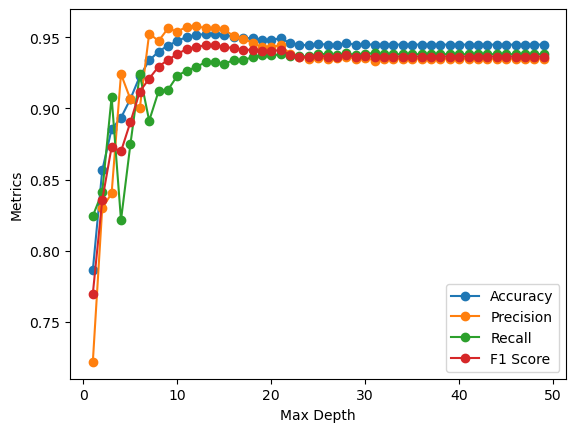

In [8]:
plt.plot(max_depth, accuracy_list, marker="o", label="Accuracy")
plt.plot(max_depth, precision_list, marker="o", label="Precision")
plt.plot(max_depth, recall_list, marker="o", label="Recall")
plt.plot(max_depth, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

In [9]:
best_max_depth = max_depth[np.argmax(recall_list)]
best_max_depth

28

## 2.4 Test Performance

In [11]:
# Define and Fit Model
DecisionTree = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
DecisionTree.fit(
    pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0)
)

# Predict
y_pred_test = DecisionTree.predict(X_test)

# Performance Metrics
accuracy_test = mt.accuracy_score(y_test, y_pred_test)
precision_test = mt.precision_score(y_test, y_pred_test)
recall_test = mt.recall_score(y_test, y_pred_test)
f1_score_test = mt.f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_score_test}")

Test Accuracy: 0.9476306337620206
Test Precision: 0.9398787026456886
Test Recall: 0.9408710954685437
Test F1 Score: 0.9403746372350718


# 3.0 Results

In [12]:
train_metrics = {
    "Algorithm": "Decision Tree",
    "Accuracy": np.round(accuracy_train, 3),
    "Precision": np.round(precision_train, 3),
    "Recall": np.round(recall_train, 3),
    "F1 Score": np.round(f1_score_train, 3),
}
validation_metrics = {
    "Algorithm": "Decision Tree",
    "Accuracy": np.round(accuracy_val, 3),
    "Precision": np.round(precision_val, 3),
    "Recall": np.round(recall_val, 3),
    "F1 Score": np.round(f1_score_val, 3),
}
test_metrics = {
    "Algorithm": "Decision Tree",
    "Accuracy": np.round(accuracy_test, 3),
    "Precision": np.round(precision_test, 3),
    "Recall": np.round(recall_test, 3),
    "F1 Score": np.round(f1_score_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./test_metrics.csv", mode="a", header=False
)